In [13]:
#Import relevant libraries
import math
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import seaborn as sns

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Basic Preprocessing

## 1. Treating Mission Values


*   Fill missing values with average or median of the column (usually preferred)
*   Set missing values to 0

In [15]:
#Load housing price dataset
data = pd.read_excel("/content/drive/MyDrive/Grad School-Files/Job Search/Data Science Basics/HousePricePrediction.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [16]:
#Find Null Values
data.isnull().sum(axis=0)

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [17]:
#Fill missing values with 0
data1 = data.fillna(0)

#Null values filled with the last non-null element using the fill forward methods
data2 = data.fillna(method='ffill')

#Null values filled with the next non-null element using the fill backward methods
data3 = data.fillna(method='bfill')

# Drop columns with missing values
data4 = data.dropna()
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotArea       1460 non-null   int64  
 4   LotConfig     1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   OverallCond   1460 non-null   int64  
 7   YearBuilt     1460 non-null   int64  
 8   YearRemodAdd  1460 non-null   int64  
 9   Exterior1st   1460 non-null   object 
 10  BsmtFinSF2    1460 non-null   float64
 11  TotalBsmtSF   1460 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 159.7+ KB


## 2. Remove Duplicates

In [18]:
#Find duplicates
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2914    False
2915    False
2916    False
2917    False
2918    False
Length: 2919, dtype: bool

In [19]:
#Drop duplicates
data5 = data.drop_duplicates()

## 3. Sort Values

In [20]:
#Return in decreasing order of sale prices
data.SalePrice.sort_values(ascending=False)

691     755000.0
1182    745000.0
1169    625000.0
898     611657.0
803     582933.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

## 3. Grouping and Aggregating Data

In [21]:
#Get average sale price by building type
data.groupby('BldgType')['SalePrice'].mean()

BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64

# Visualization

In [29]:
data = pd.read_csv("/content/drive/MyDrive/Grad School-Files/Job Search/Data Science Basics/mtcars.csv")
data_columns = data.columns[1:]

In [31]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## 1. Functional Method

Text(0.5, 1.0, 'Gross horsepower vs. miles per gallon')

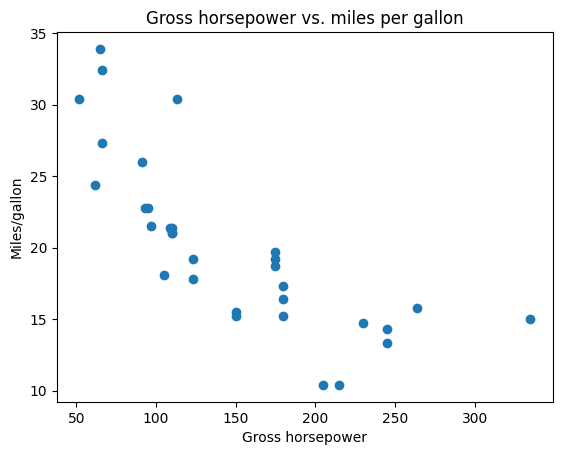

In [59]:
#Scatter plot in Matplotlib by the functional method
plt.scatter(data['hp'], data['mpg'])
plt.xlabel('Gross horsepower')
plt.ylabel('Miles/gallon')
plt.title('Gross horsepower vs. miles per gallon')

Text(0.5, 1.0, 'Transmission vs. miles per gallon')

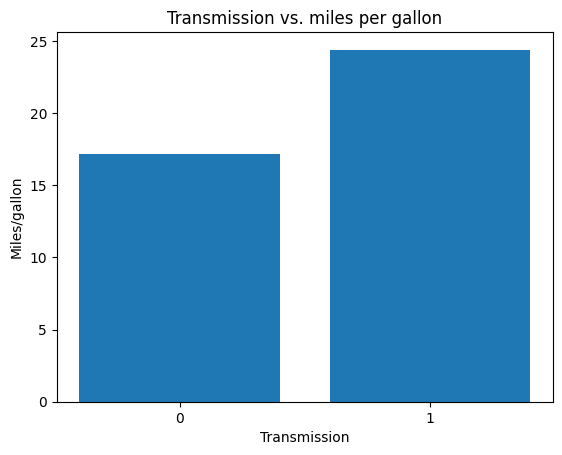

In [60]:
#Plot bar chart for transmission vs. mpg with the functional method
data_mpg_am = data.groupby('am')['mpg'].mean().reset_index()
plt.bar(data_mpg_am['am'], data_mpg_am['mpg'])
plt.xlabel('Transmission')
plt.ylabel('Miles/gallon')
plt.xticks([1,0])
plt.title('Transmission vs. miles per gallon')

## 2. Object-Oriented Plotting



1.   Create a blank figure
2.   Add axes
3.   Specify plot and layout parameters
4.   Generate plot




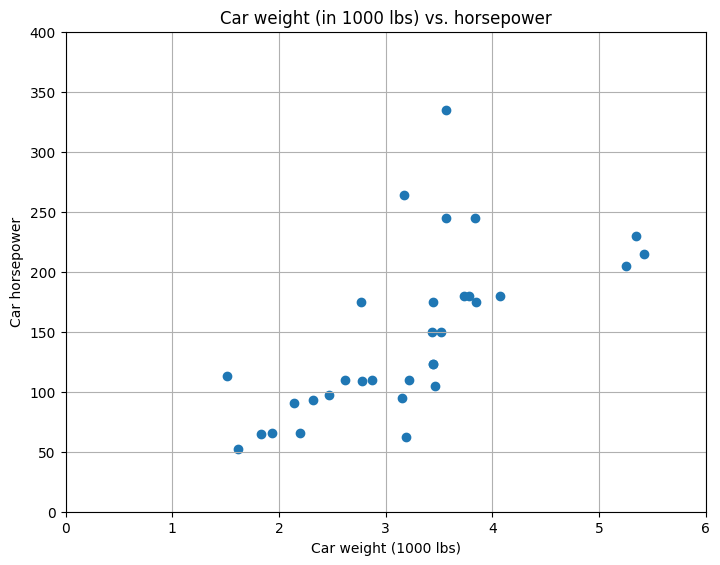

In [73]:
#Create a blank figure
fig = plt.figure()

#Add axis
ax = fig.add_axes([1,1,1,1])

#Specify parameters
ax.set_xlim([0,6])
ax.set_ylim([0, 400])
ax.set_xlabel('Car weight (1000 lbs)')
ax.set_ylabel('Car horsepower')
ax.set_title('Car weight (in 1000 lbs) vs. horsepower')

#Generate scatter plot
ax.grid() # Add grid
ax.scatter(data['wt'], data['hp'])


<Figure size 640x480 with 0 Axes>

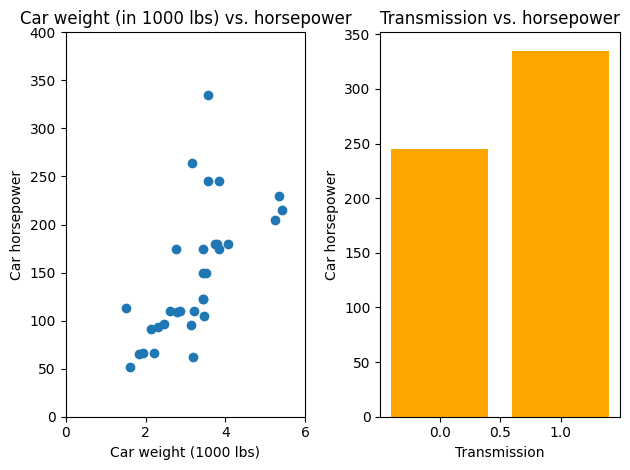

In [81]:
#Create subplots

#Create a blank figure
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1,2)

#Specify parameters
ax1.set_xlim([0,6])
ax1.set_ylim([0, 400])
ax1.set_xlabel('Car weight (1000 lbs)')
ax1.set_ylabel('Car horsepower')
ax1.set_title('Car weight (in 1000 lbs) vs. horsepower')


ax2.set_xlabel('Transmission')
ax2.set_ylabel('Car horsepower')
ax2.set_title('Transmission vs. horsepower')

#Generate scatter plot

ax1.scatter(data['wt'], data['hp'])
ax2.bar(data['am'], data['hp'], color=['orange'])
fig.tight_layout()
plt.show()

## 3. Labels and Annotations

In [105]:
data = data.rename(columns={"Unnamed: 0": "car_name"})

<ipython-input-131-bc554fe0d407>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.car_name, rotation=90, fontsize='small')
<ipython-input-131-bc554fe0d407>:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


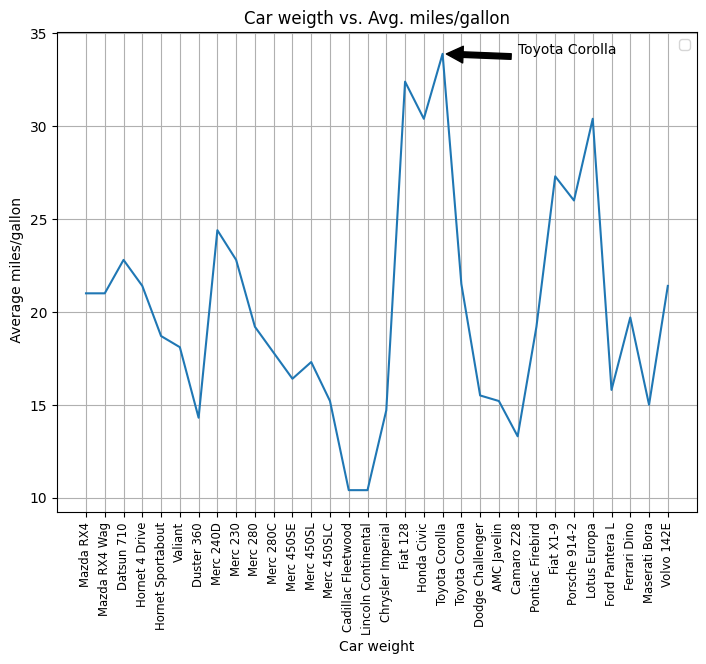

In [131]:
#Create a blank figure
fig = plt.figure()

#Add axis
ax = fig.add_axes([1,1,1,1])

#Specify parameters
ax.set_xlabel('Car weight')
ax.set_xticklabels(data.car_name, rotation=90, fontsize='small')
ax.set_ylabel(' Average miles/gallon')
ax.set_title('Car weigth vs. Avg. miles/gallon')
ax.legend(loc='best')
ax.annotate(data.loc[data['mpg'].idxmax()]['car_name'], xy= (data[['mpg']].idxmax(), data['mpg'].max()), xytext=(data[['mpg']].idxmax() + 4, data['mpg'].max()), arrowprops=dict(facecolor='black', shrink=0.05))

#Generate scatter plot
ax.grid()
ax.plot(data['car_name'], data['mpg'])
fig.tight_layout()
plt.show()

## 4. Time Series

In [143]:
data = pd.read_csv("/content/drive/MyDrive/Grad School-Files/Job Search/Data Science Basics/RELIANCE.csv", index_col='Date', parse_dates=True)
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


<ipython-input-162-2de693e8e3d1>:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


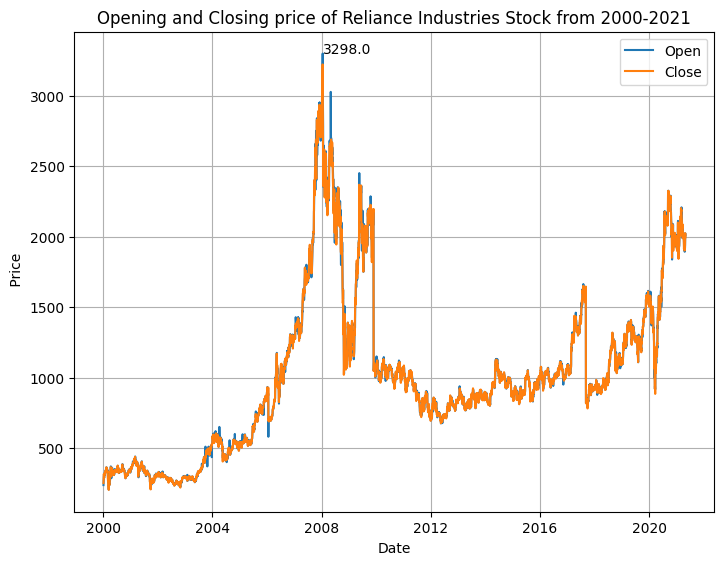

In [162]:
#Create a blank figure
fig = plt.figure()

#Add axis
ax = fig.add_axes([1,1,1,1])

#Specify parameters
ax.set_xlabel('Date')
#ax.set_xticklabels(data.car_name, rotation=90, fontsize='small')
ax.set_ylabel(' Price')
ax.set_title('Opening and Closing price of Reliance Industries Stock from 2000-2021')
ax.annotate(data['Open'].max(), xy= (data[['Open']].idxmax(), data['Open'].max()))

#Generate scatter plot
ax.grid()
ax.plot(data['Open'])
ax.plot(data['Close'])
ax.legend(['Open', 'Close'], loc='best')
fig.tight_layout()
plt.show()

## 5. Statistical Plots

In [163]:
#Load data
data = pd.read_csv("/content/drive/MyDrive/Grad School-Files/Job Search/Data Science Basics/mtcars.csv")
data = data.rename(columns={"Unnamed: 0": "car_name"})

<ipython-input-166-b22110cadde8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['mpg']).set(title='Probability distribution of miles/gallon')


[Text(0.5, 1.0, 'Probability distribution of miles/gallon')]

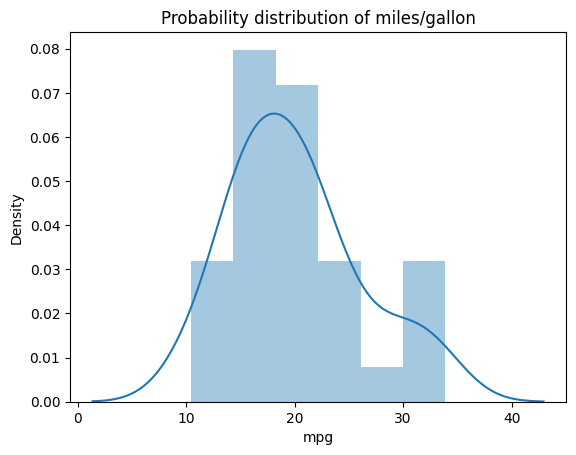

In [166]:
#Create a histogram of miles/gallon in seaborn
sns.distplot(data['mpg']).set(title='Probability distribution of miles/gallon')

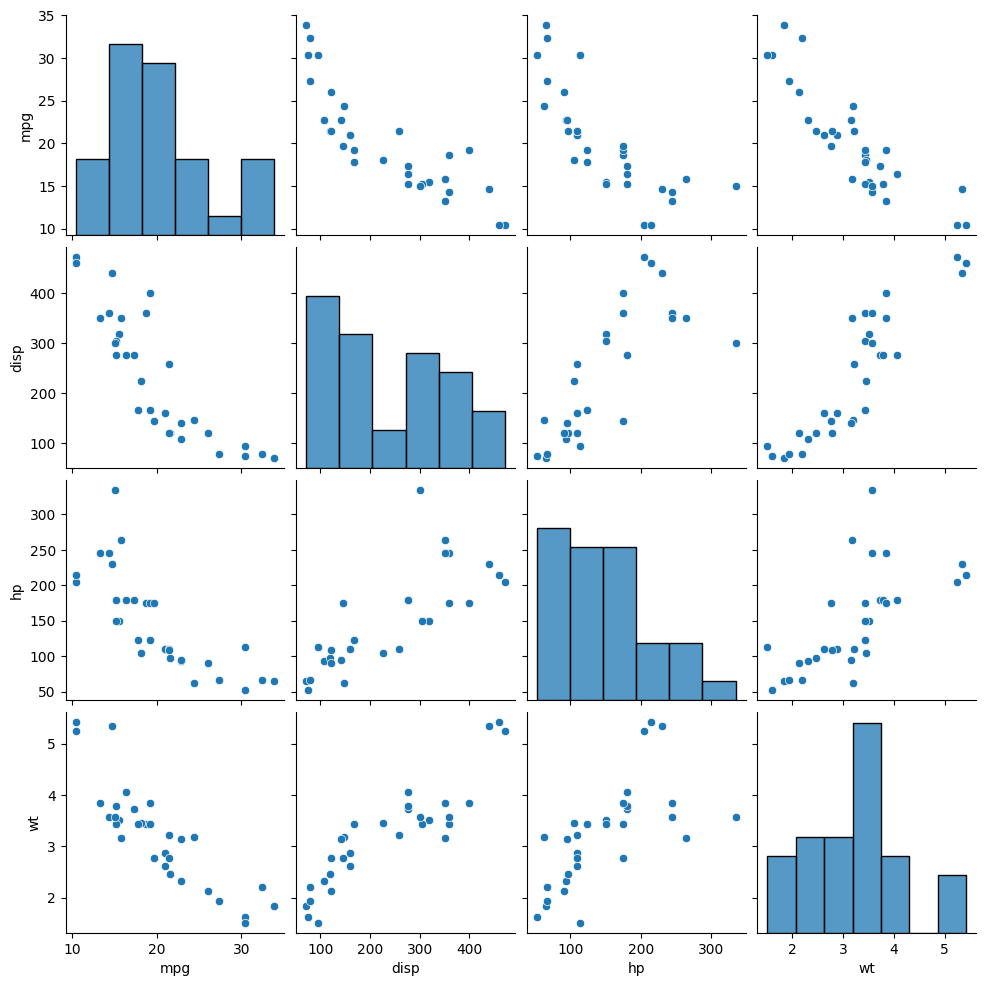

In [168]:
#Create paired plots to look for any anomalies
data_subsets = data[['mpg', 'disp', 'hp', 'wt']]
sns.pairplot(data_subsets)
plt.show()

<Axes: xlabel='am', ylabel='mpg'>

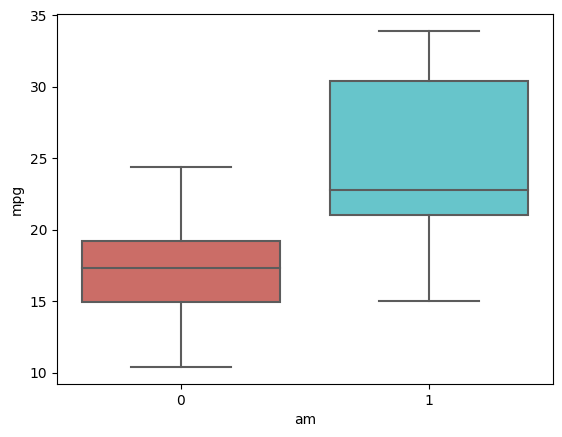

In [173]:
#Create boxplots using seaborn
sns.boxplot(x='am', y='mpg', data=data, palette='hls')